In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [27]:
data = pd.read_excel('Online_Retail.xlsx')
print(data.head())

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [28]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [29]:
data = data.dropna()
data.drop_duplicates
# print(data.isna().sum())
print(data)

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


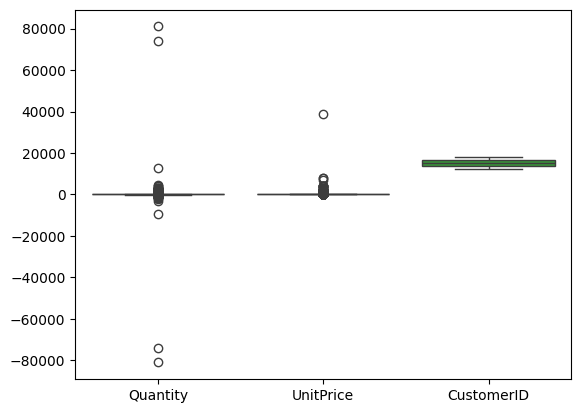

In [30]:
sns.boxplot(data)
plt.show()

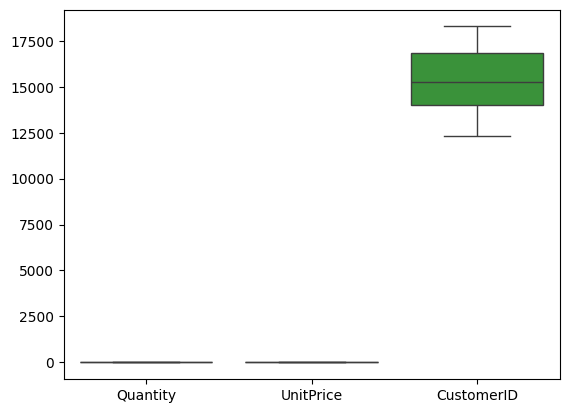

<class 'pandas.core.frame.DataFrame'>
Index: 328479 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    328479 non-null  object        
 1   StockCode    328479 non-null  object        
 2   Description  328479 non-null  object        
 3   Quantity     328479 non-null  int64         
 4   InvoiceDate  328479 non-null  datetime64[ns]
 5   UnitPrice    328479 non-null  float64       
 6   CustomerID   328479 non-null  float64       
 7   Country      328479 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 22.6+ MB
None


In [45]:
iqr_quantity = iqr(data['Quantity'])
lower_thresold_quantity = np.quantile(data['Quantity'], 0.25) - 1.5 * iqr_quantity
upper_thresold_quantity = np.quantile(data['Quantity'], 0.75) + 1.5 * iqr_quantity
data = data[(data['Quantity'] >= lower_thresold_quantity) & (data['Quantity'] <= upper_thresold_quantity)]

iqr_unitprice = iqr(data['UnitPrice'])
lower_thresold_unitprice = np.quantile(data['UnitPrice'], 0.25) - 1.5 * iqr_unitprice
upper_thresold_unitprice = np.quantile(data['UnitPrice'], 0.75) + 1.5 * iqr_unitprice
Customer_data = data[(data['UnitPrice'] >= lower_thresold_unitprice) & (data['UnitPrice'] <= upper_thresold_unitprice)]

iqr_customerid = iqr(data['CustomerID'])
lower_thresold_unitprice = np.quantile(data['CustomerID'], 0.25) - 1.5 * iqr_unitprice
upper_thresold_unitprice = np.quantile(data['CustomerID'], 0.75) + 1.5 * iqr_unitprice
Customer_data = data[(data['UnitPrice'] >= lower_thresold_unitprice) & (data['UnitPrice'] <= upper_thresold_unitprice)]

sns.boxplot(Customer_data)
plt.show()

print(Customer_data.info())